In [2]:
import pandas as pd

In [107]:
df = pd.read_csv('train.csv')
df_gk = df[df['position']=='GK']
df_field = df[df['position']!='GK']
df = df_field

In [109]:
columnt_to_drop = ['goalkeeping_speed', 
                   'goalkeeping_reflexes', 
                   'goalkeeping_positioning', 
                   'goalkeeping_kicking',
                   'goalkeeping_handling',
                   'goalkeeping_diving',
                   'value_eur',
                   'wage_eur',
                   'birthday_date',
                   'height_cm',
                   'weight_kg',
                   'club_name',
                   'league_name',
                   'league_level',
                   'club_jersey_number',
                   'club_loaned_from',
                   'club_joined',
                   'club_contract_valid_until',
                   'nation_jersey_number',
                   'release_clause_eur',
                   'real_face',
                   'id',
                   'short_name',
                   'overall',
                   'potential',
                   'nationality_name',
                   'body_type',
                   'international_reputation',
                   'player_tags',
                   'player_traits',
                   'work_rate',
                   'weak_foot',
                   'skill_moves'
                   ]

df = df.drop(columnt_to_drop, axis=1)


KeyError: "['goalkeeping_speed', 'goalkeeping_reflexes', 'goalkeeping_positioning', 'goalkeeping_kicking', 'goalkeeping_handling', 'goalkeeping_diving', 'value_eur', 'wage_eur', 'birthday_date', 'height_cm', 'weight_kg', 'club_name', 'league_name', 'league_level', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nation_jersey_number', 'release_clause_eur', 'real_face', 'id', 'short_name', 'overall', 'potential', 'nationality_name', 'body_type', 'international_reputation', 'player_tags', 'player_traits', 'work_rate', 'weak_foot', 'skill_moves'] not found in axis"

In [100]:

df = pd.get_dummies(df, prefix='position', drop_first=True)
df.head(10)

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,position_RB,position_RCB,position_RCM,position_RDM,position_RF,position_RM,position_RS,position_RW,position_RWB,position_ST
0,70.0,52.0,60.0,70.0,67.0,66.0,64,40,56,65,...,False,False,False,False,False,False,False,False,False,False
1,65.0,38.0,58.0,60.0,63.0,67.0,50,31,59,64,...,False,False,False,False,False,False,False,False,False,False
2,79.0,35.0,58.0,66.0,59.0,64.0,59,30,53,60,...,False,False,False,False,False,False,False,False,False,False
3,64.0,74.0,51.0,68.0,24.0,76.0,32,78,75,59,...,False,False,False,False,False,False,False,False,False,False
4,74.0,53.0,59.0,53.0,61.0,69.0,64,38,49,63,...,False,False,False,False,False,False,False,False,False,False
5,76.0,65.0,60.0,68.0,27.0,57.0,70,68,67,65,...,False,False,False,False,False,False,False,True,False,False
7,67.0,49.0,52.0,54.0,60.0,76.0,31,54,64,60,...,False,False,False,False,False,False,False,False,False,False
8,80.0,52.0,56.0,64.0,62.0,79.0,64,47,60,65,...,False,False,False,False,False,True,False,False,False,False
9,68.0,61.0,65.0,60.0,58.0,71.0,64,59,59,65,...,False,False,True,False,False,False,False,False,False,False
10,66.0,41.0,63.0,48.0,59.0,62.0,67,28,40,66,...,False,False,False,False,False,False,False,False,False,False


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 


/var/folders/vd/tdjtsvvd6n9570nygscfprww0000gn/T/ipykernel_13459/2587788109.py:37: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


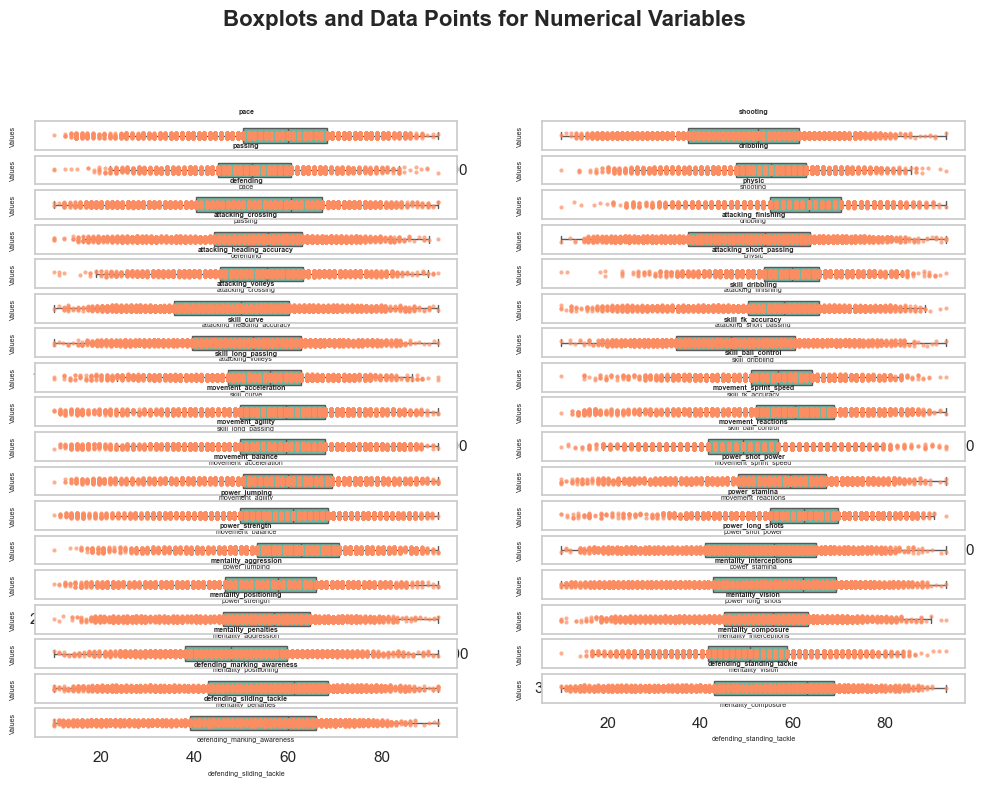

In [101]:
# Select numerical variables and remove 'id'
num_vars = df.select_dtypes(include=[np.number]).columns.tolist()
#num_vars.remove('id')
num_cols = 2
num_rows = (len(num_vars) + 1) // num_cols

# Set Seaborn style
sns.set(style="whitegrid")  # White grid background

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten()

# Custom colors
box_color = "#66c2a5"  # A shade of green
point_color = "#fc8d62"  # A shade of orange

# Create boxplots and scatter points for each numerical variable
for i, var in enumerate(num_vars):
    # Custom boxplot color
    sns.boxplot(x=df[var], ax=axes[i], color=box_color, width=0.5, fliersize=0)
    
    # Custom stripplot color
    sns.stripplot(x=df[var], ax=axes[i], color=point_color, size=3, alpha=0.7, jitter=True)
    
    # Title and labels
    axes[i].set_title(f'{var}', fontsize=5, fontweight='bold')
    axes[i].set_xlabel(var, fontsize=5)
    axes[i].set_ylabel('Values', fontsize=5)
    axes[i].grid(axis='x')  # Add grid lines for better readability

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle('Boxplots and Data Points for Numerical Variables', fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

/var/folders/vd/tdjtsvvd6n9570nygscfprww0000gn/T/ipykernel_13459/2707109220.py:29: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


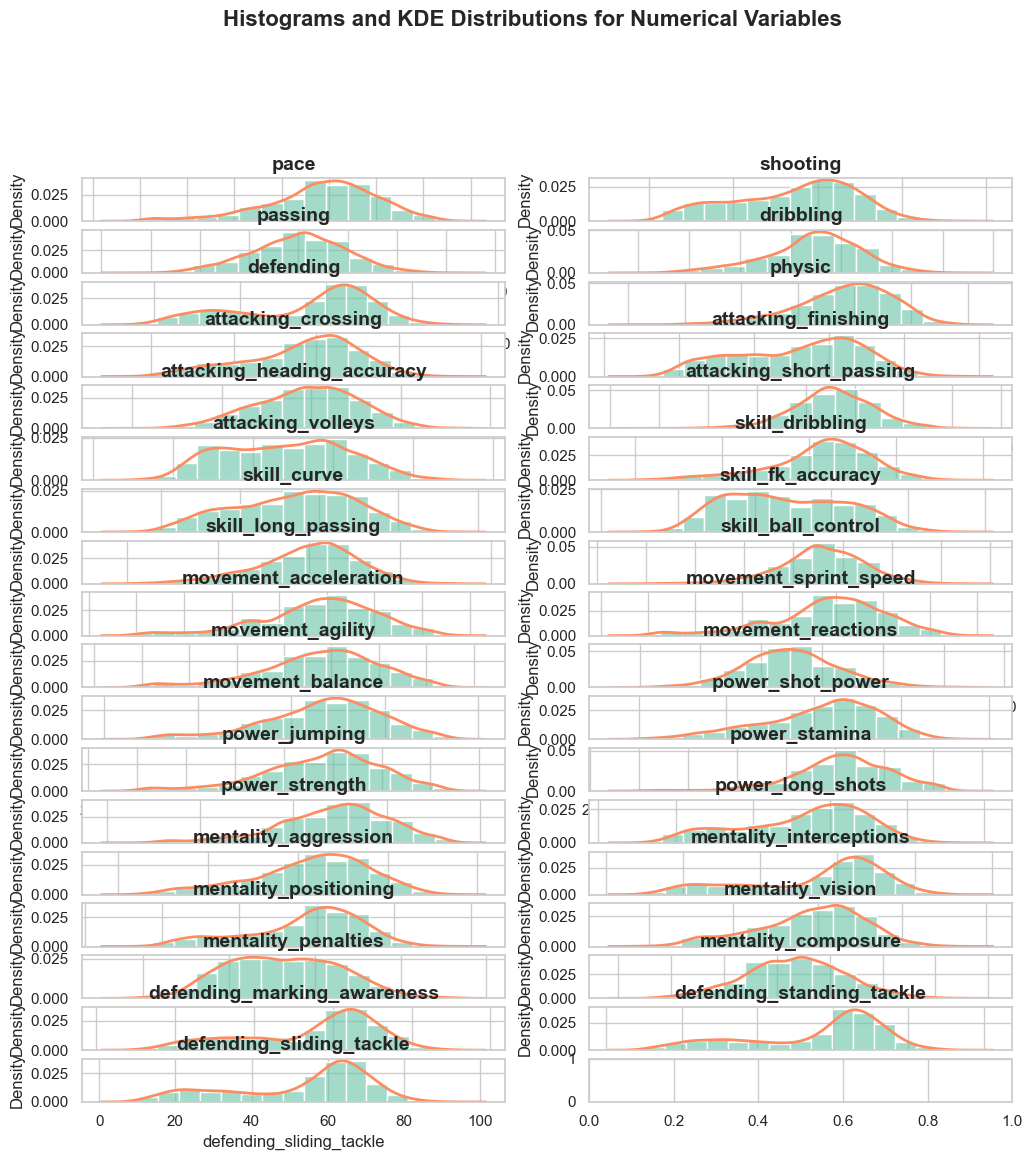

In [76]:
# Select numerical variables and remove 'id'
num_vars = df.select_dtypes(include=[np.number]).columns.tolist()
#num_vars.remove('id')
num_cols = 2
num_rows = (len(num_vars) + 1) // num_cols

sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
axes = axes.flatten()
# Custom colors
hist_color = "#66c2a5"
kde_color = "#fc8d62" 

# Create histograms and KDE plots for each numerical variable
for i, var in enumerate(num_vars):
    # Histogram and plot
    sns.histplot(df[var], ax=axes[i], color=hist_color, bins=15, kde=False, stat='density', alpha=0.6)
    sns.kdeplot(df[var], ax=axes[i], color=kde_color, linewidth=2)
    
    # Title and labels
    axes[i].set_title(f'{var}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)
    

fig.suptitle('Histograms and KDE Distributions for Numerical Variables', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

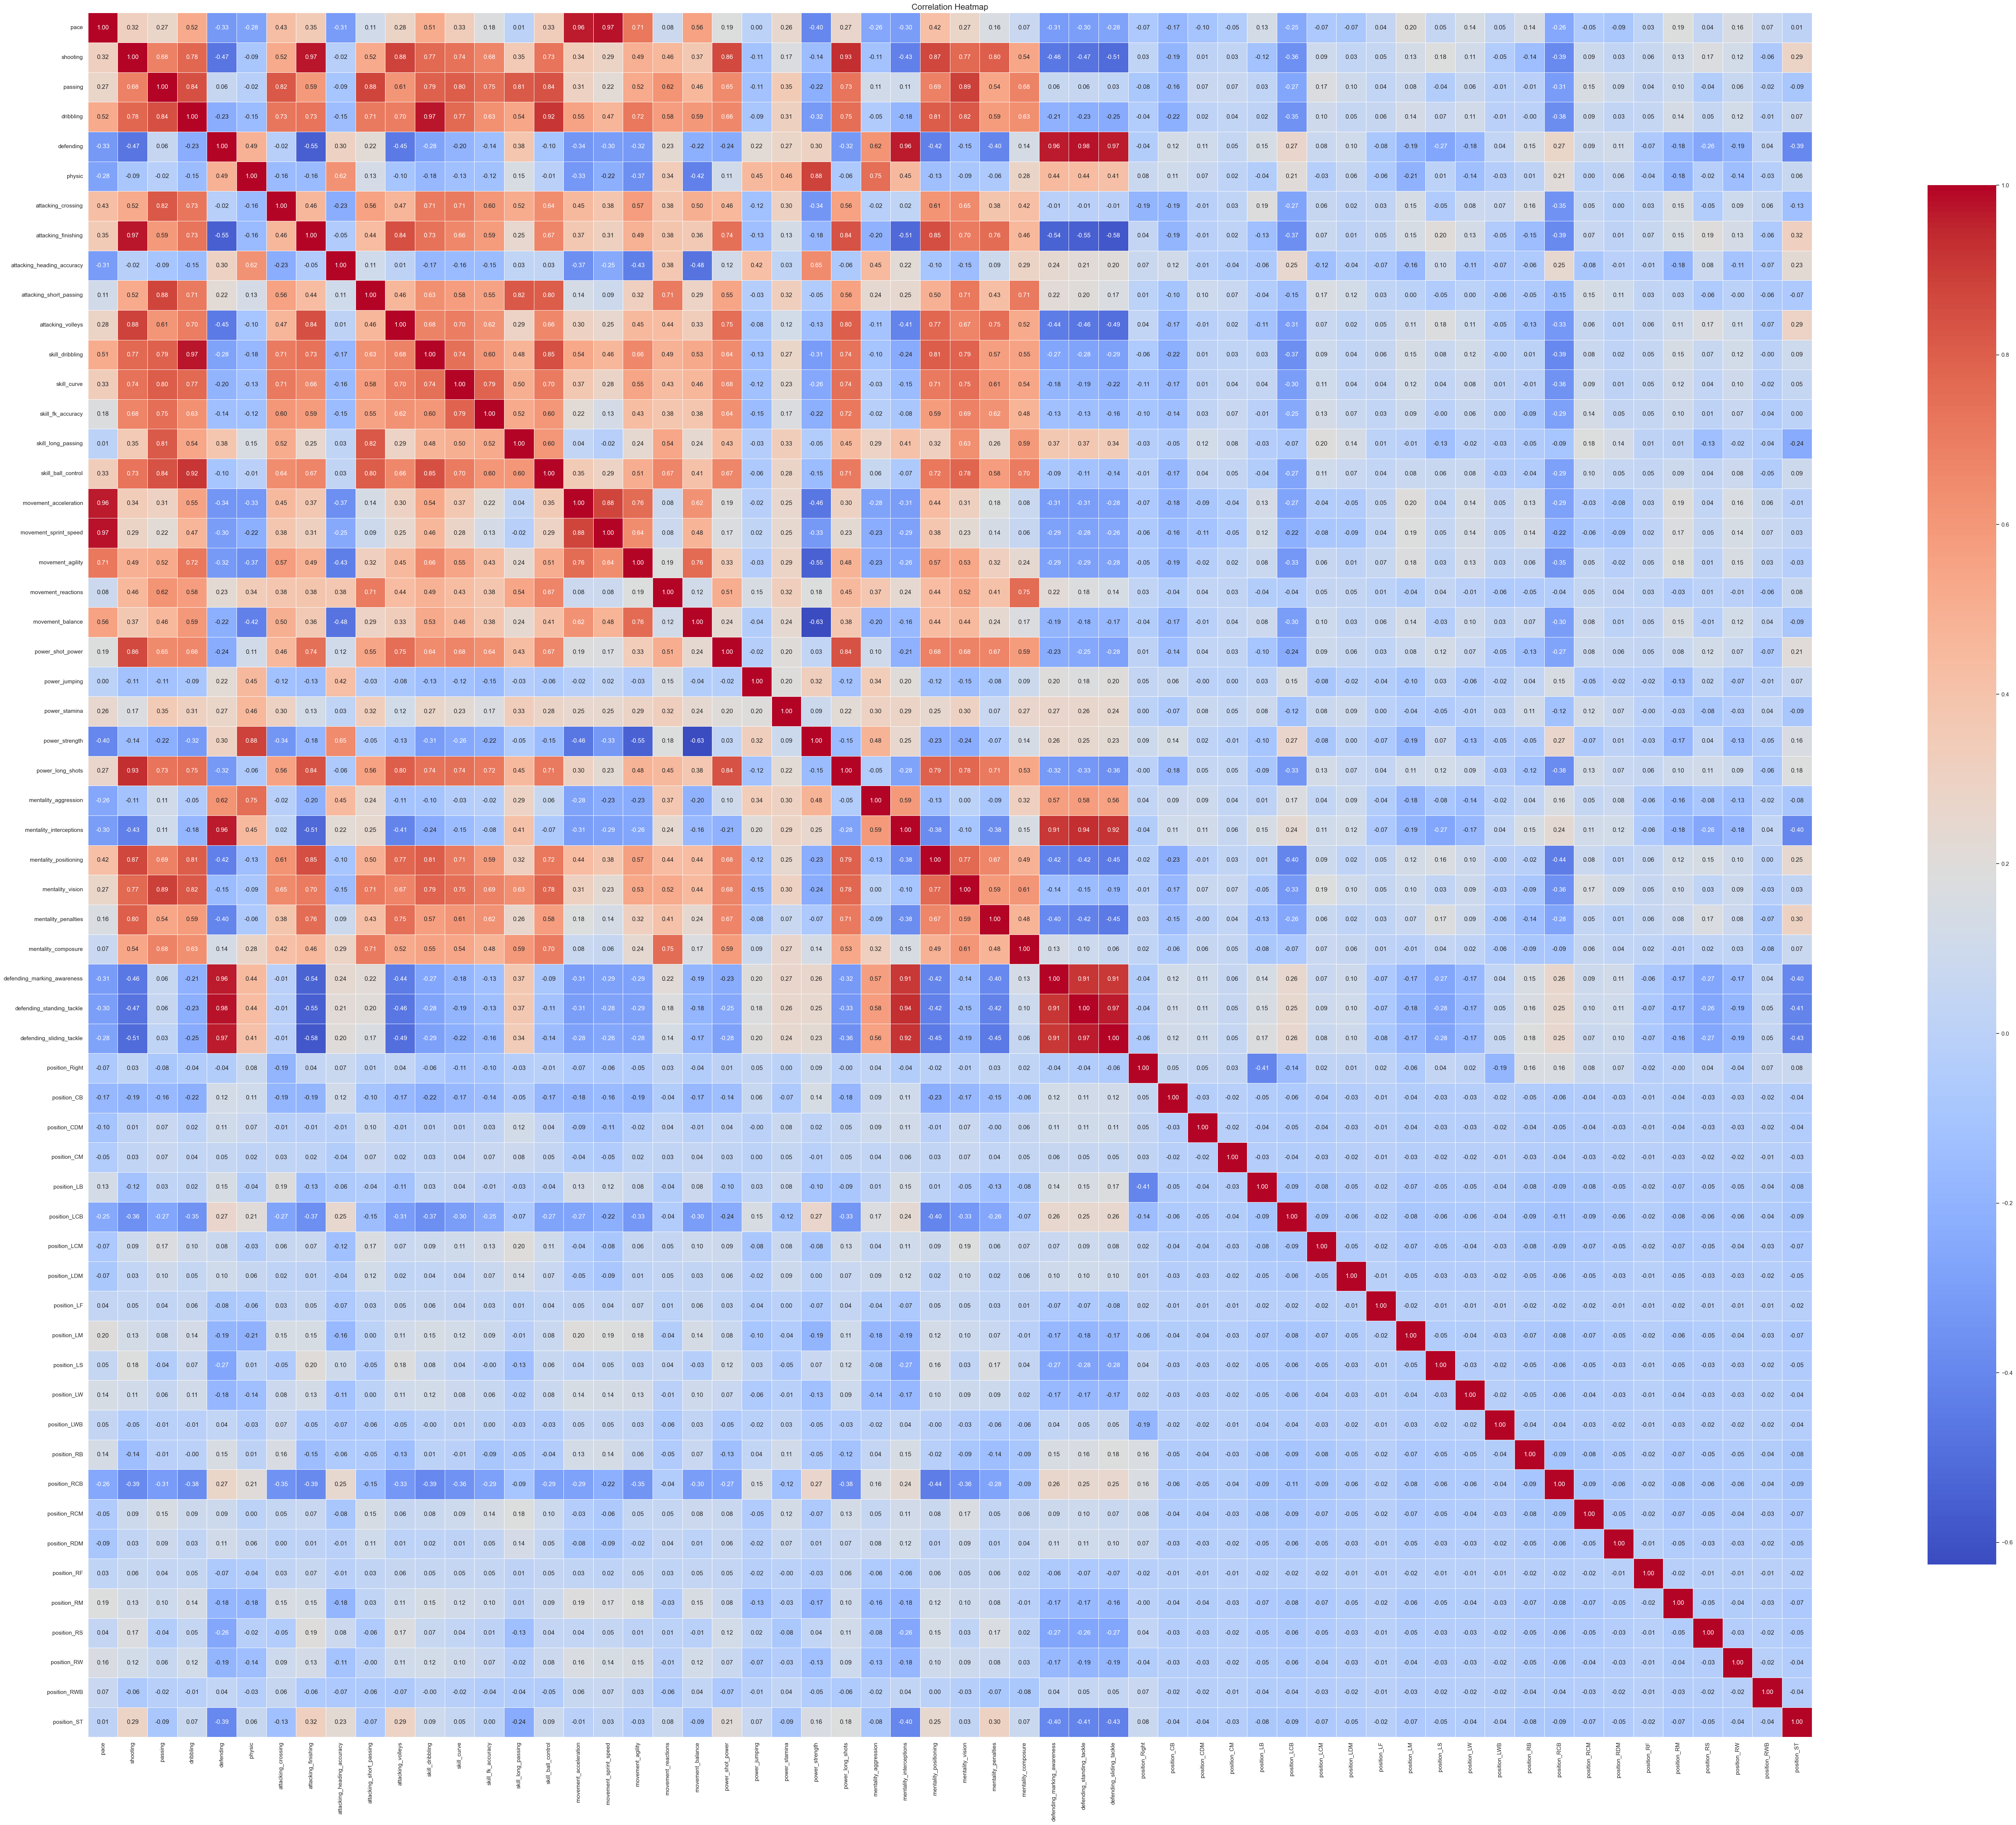

In [105]:
correlation_matrix = df.corr()

plt.figure(figsize=(80, 60))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:

from sklearn.model_selection import train_test_split


def split_data(df):
    X = df.drop('position', axis=1)
    y = df['position']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(df)


In [ ]:
X_train = pd.get_dummies(X_train, prefix='position', drop_first=True)
X_test = pd.get_dummies(X_test, prefix='position', drop_first=True)


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from train import train_random_forest
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, f1_score

model = rf_clf = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

roc_auc_train = roc_auc_score(y_train, train_predictions).round(round_digits)
        
# Compute ROC AUC for the test set
roc_auc_test = roc_auc_score(y_test, test_predictions).round(round_digits)

# Optionally print the results

print(f"ROC AUC for Training Set: {roc_auc_train}")
print(f"ROC AUC for Test Set: {roc_auc_test}")



Model Accuracy: 0.4014365522745411
---> Random Forest
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


ValueError: 
All the 1440 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsdm_main_venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/dsdm_main_venv/lib/python3.13/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/miniconda3/envs/dsdm_main_venv/lib/python3.13/site-packages/sklearn/ensemble/_forest.py", line 424, in fit
    y = np.ascontiguousarray(y, dtype=DOUBLE)
ValueError: could not convert string to float: 'CDM'

--------------------------------------------------------------------------------
1152 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsdm_main_venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/dsdm_main_venv/lib/python3.13/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/miniconda3/envs/dsdm_main_venv/lib/python3.13/site-packages/sklearn/ensemble/_forest.py", line 424, in fit
    y = np.ascontiguousarray(y, dtype=DOUBLE)
ValueError: could not convert string to float: 'RM'
